###Load the dataset


In [1]:
# imoprt required library
import numpy as np              # For numerical operations
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For Data visaulization

In [2]:
# Load the dataset
df = pd.read_csv("/content/scrapeme_products.csv")

In [3]:
print("First 5 rows:\n")
df.head()

First 5 rows:



,Name,Price,Link,Description,SKU,Category,Tags,Stock
0,Bulbasaur,£63.00,https://scrapeme.live/shop/Bulbasaur/,\nBulbasaur can be seen napping in bright sunl...,4391,"Categories: Pokemon, Seed","Tags: bulbasaur, Overgrow, Seed",45 in stock
1,Ivysaur,£87.00,https://scrapeme.live/shop/Ivysaur/,\nThere is a bud on this Pokémon’s back. To su...,7227,"Categories: Pokemon, Seed","Tags: ivysaur, Overgrow, Seed",142 in stock
2,Venusaur,£105.00,https://scrapeme.live/shop/Venusaur/,\nThere is a large flower on Venusaur’s back. ...,7036,"Categories: Pokemon, Seed","Tags: Overgrow, Seed, venusaur",30 in stock
3,Charmander,£48.00,https://scrapeme.live/shop/Charmander/,\nThe flame that burns at the tip of its tail ...,9086,"Categories: Lizard, Pokemon","Tags: Blaze, charmander, Lizard",206 in stock
4,Charmeleon,£165.00,https://scrapeme.live/shop/Charmeleon/,\nCharmeleon mercilessly destroys its foes usi...,6565,"Categories: Flame, Pokemon","Tags: Blaze, charmeleon, Flame",284 in stock


###EDA

In [4]:
# Remove currency symbols "£" form price column and convert it to float
df["Price"] = df["Price"].str.replace("£", "").astype(float)

In [5]:
# Remove Categories word from Category column
df["Category"] = df["Category"].str.replace("Categories:", "").str.strip()

In [6]:
# Remove Tags word from Tags colulmn
df["Tags"] = df["Tags"].str.replace("Tags:", "").str.strip()

In [7]:
# Remove In stock words from Stock colulmn and convert it to intger
df["Stock"] = df["Stock"].str.replace("in stock", "").str.strip().astype(int)

In [8]:
# Split the Category column to 2 columns (Category and Sub_Category)
df["Sub_Category"] = df["Category"].str.replace("Pokemon", "").str.replace(",", "").str.strip()
df["Category"] = "Pokemon"

In [9]:
# Show the first 5 after update
print("First 5 rows after update:\n")
df.head()

First 5 rows after update:



,Name,Price,Link,Description,SKU,Category,Tags,Stock,Sub_Category
0,Bulbasaur,63.0,https://scrapeme.live/shop/Bulbasaur/,\nBulbasaur can be seen napping in bright sunl...,4391,Pokemon,"bulbasaur, Overgrow, Seed",45,Seed
1,Ivysaur,87.0,https://scrapeme.live/shop/Ivysaur/,\nThere is a bud on this Pokémon’s back. To su...,7227,Pokemon,"ivysaur, Overgrow, Seed",142,Seed
2,Venusaur,105.0,https://scrapeme.live/shop/Venusaur/,\nThere is a large flower on Venusaur’s back. ...,7036,Pokemon,"Overgrow, Seed, venusaur",30,Seed
3,Charmander,48.0,https://scrapeme.live/shop/Charmander/,\nThe flame that burns at the tip of its tail ...,9086,Pokemon,"Blaze, charmander, Lizard",206,Lizard
4,Charmeleon,165.0,https://scrapeme.live/shop/Charmeleon/,\nCharmeleon mercilessly destroys its foes usi...,6565,Pokemon,"Blaze, charmeleon, Flame",284,Flame


In [10]:
# Shape of dataset
print("Shape of Dataset:" , df.shape)

Shape of Dataset: (755, 9)


In [11]:
# Dataset information
print("Dataset info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          755 non-null    object 
 1   Price         755 non-null    float64
 2   Link          755 non-null    object 
 3   Description   755 non-null    object 
 4   SKU           755 non-null    int64  
 5   Category      755 non-null    object 
 6   Tags          755 non-null    object 
 7   Stock         755 non-null    int64  
 8   Sub_Category  755 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 53.2+ KB
Dataset info:
 None


In [12]:
# Statistics discriptive
print("Summary statistics:\n")
df.describe()

Summary statistics:



,Price,SKU,Stock
count,755.000000,755.000000,755.000000
mean,110.948344,5450.229139,154.778808
std,51.702359,2647.741068,84.303655
min,25.000000,1004.000000,10.000000
25%,66.000000,3163.500000,80.000000
50%,111.000000,5333.000000,151.000000
75%,157.000000,7768.000000,228.500000
max,200.000000,9991.000000,300.000000


In [13]:
# Check if there is missing values
print("Missing values:\n")
df.isnull().sum()

Missing values:



,0
Name,0
Price,0
Link,0
Description,0
SKU,0
Category,0
Tags,0
Stock,0
Sub_Category,0


In [14]:
# Check if there is duplicated
print("Missing values:\n")
df.isnull().sum()

Missing values:



,0
Name,0
Price,0
Link,0
Description,0
SKU,0
Category,0
Tags,0
Stock,0
Sub_Category,0


###Plot for EDA

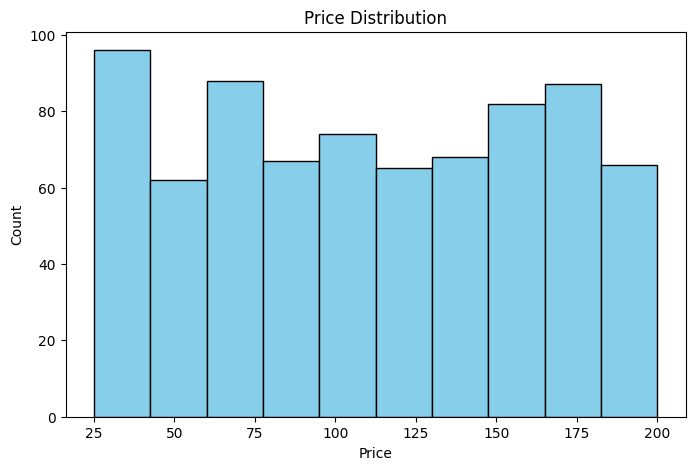

In [15]:
# Histogram to the Distribution of product prices
plt.figure(figsize=(8,5))
plt.hist(df["Price"], bins=10, color="skyblue", edgecolor="black")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

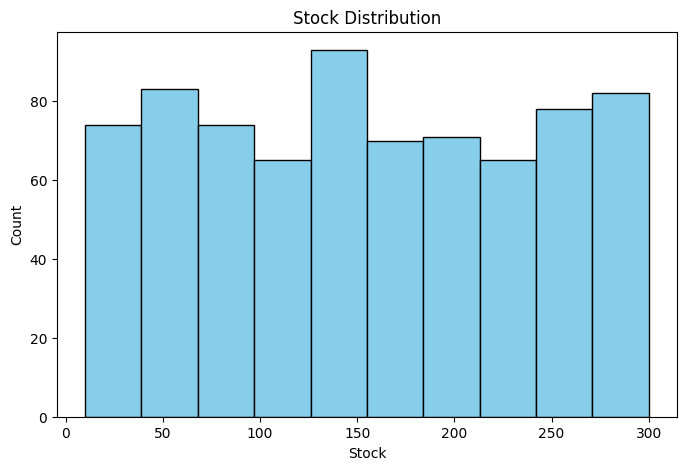

In [16]:
# Histogram to the Distribution of product Stocks
plt.figure(figsize=(8,5))
plt.hist(df["Stock"], bins=10, color="skyblue", edgecolor="black")
plt.title("Stock Distribution")
plt.xlabel("Stock")
plt.ylabel("Count")
plt.show()

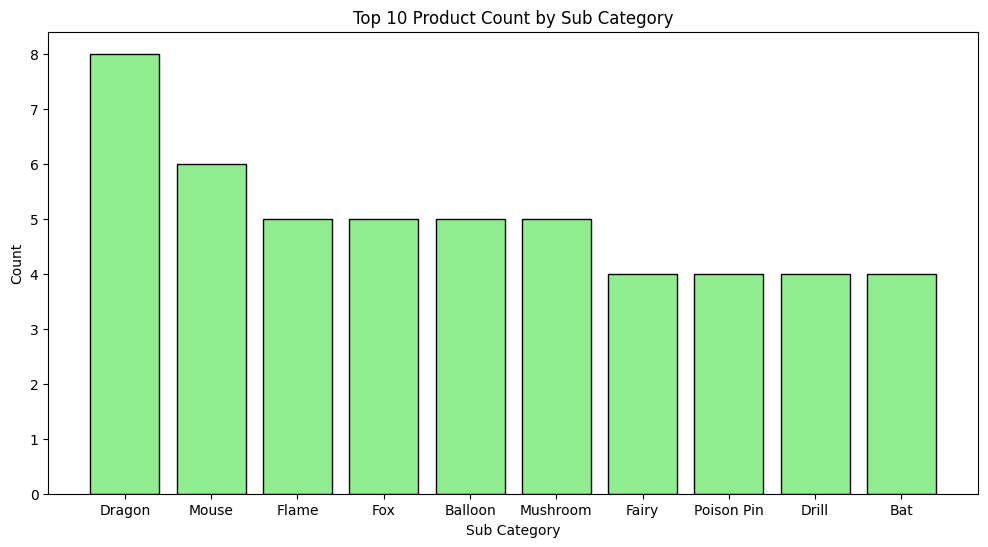

In [17]:
# Bar chart that Count products for each Sub Category and take Top 10
Sub_Category_counts = df["Sub_Category"].value_counts().head(10)

plt.figure(figsize=(12 , 6))
plt.bar(Sub_Category_counts.index, Sub_Category_counts.values, color="lightgreen", edgecolor="black")
plt.title("Top 10 Product Count by Sub Category")
plt.xlabel("Sub Category")
plt.ylabel("Count")
plt.show()



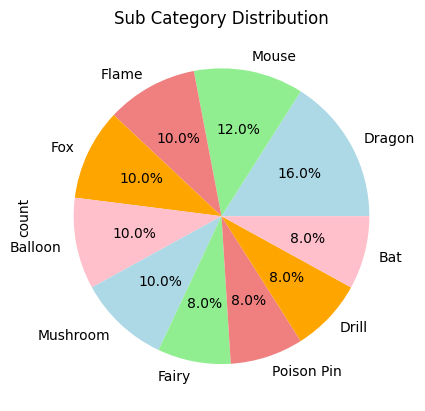

In [18]:
# Pie chart for Sub Category Distribution
Sub_Category_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightblue', 'lightgreen', 'lightcoral', 'orange', 'pink'],
)
plt.title('Sub Category Distribution')
plt.show()

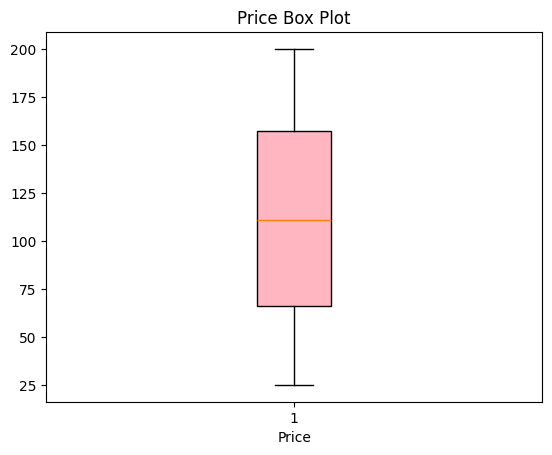

In [19]:
# Box plot that show the distribution of product price
plt.boxplot(df['Price'], patch_artist=True, boxprops=dict(facecolor='lightpink'))
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()

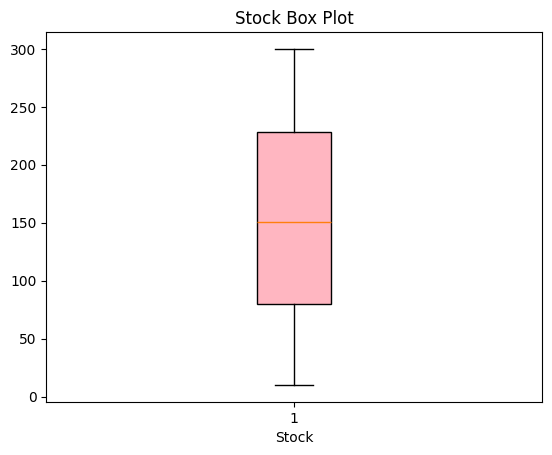

In [20]:
# Box plot that show the distribution of product Stock
plt.boxplot(df['Stock'], patch_artist=True, boxprops=dict(facecolor='lightpink'))
plt.title('Stock Box Plot')
plt.xlabel('Stock')
plt.show()

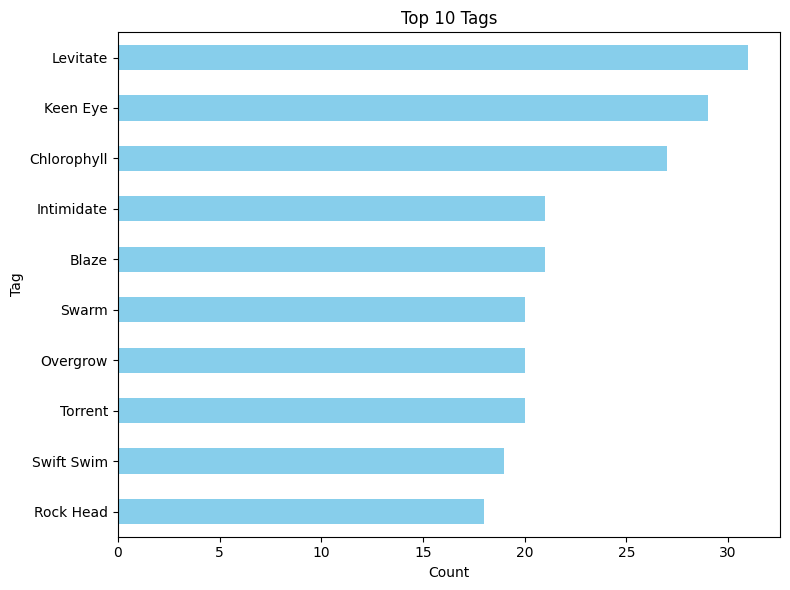

In [21]:
# Split Tags count each Tag
tag_counts = df['Tags'].str.split(',').explode().str.strip().value_counts()

# take Top 10
top_tags = tag_counts.head(10)

# Bar chart for the top 10 Tags
top_tags.sort_values().plot(kind='barh', color='skyblue', figsize=(8,6))
plt.title("Top 10 Tags")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.tight_layout()
plt.show()
